<a href="https://colab.research.google.com/github/JanhaviSoni7/DS-ML-Fundamental-Projects/blob/main/AQI_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('/city_day.csv',na_values='=')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df2=df.copy()

In [ ]:
#dealing with null values
df2 = df2.fillna(df2.select_dtypes(include='number').mean())

In [ ]:
df2.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,NaN
1,Ahmedabad,02-01-2015,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,NaN
2,Ahmedabad,03-01-2015,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,NaN
3,Ahmedabad,04-01-2015,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,NaN
4,Ahmedabad,05-01-2015,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,NaN


In [ ]:
#feature selection(dropping unwanted columns)
df2 = df2.drop(['Date', 'AQI_Bucket'], axis=1)

In [ ]:
#mapping
dist=(df2['City'])
distset=set(dist)
dd=list(distset)
dict0fWords = { dd[i]: i for i in range(0, len (dd)) }
df2['City']=df2['City'].map(dict0fWords)

In [ ]:
print(dict0fWords)

{'Amritsar': 0, 'Ernakulam': 1, 'Delhi': 2, 'Guwahati': 3, 'Jorapokhar': 4, 'Talcher': 5, 'Patna': 6, 'Coimbatore': 7, 'Mumbai': 8, 'Ahmedabad': 9, 'Chandigarh': 10, 'Chennai': 11, 'Hyderabad': 12, 'Lucknow': 13, 'Visakhapatnam': 14, 'Gurugram': 15, 'Bhopal': 16, 'Aizawl': 17, 'Kochi': 18, 'Bengaluru': 19, 'Amaravati': 20, 'Thiruvananthapuram': 21, 'Shillong': 22, 'Kolkata': 23, 'Jaipur': 24, 'Brajrajnagar': 25}


In [ ]:
# dist=(df2['AQI_Bucket'])
# distset=set(dist)
# dd=list(distset)
# dict0fWords = { dd[i] : i for i in range(0, len (dd))}
# df2['AQI_Bucket']=df2['AQI_Bucket'].map(dict0fWords)

In [ ]:
# df2["AQI_Bucket"]=df2["AQI_Bucket"].fillna(df2["AQI_Bucket"].mean())

In [ ]:
df2.isnull().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


In [ ]:
df2

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,9,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581
1,9,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581
2,9,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581
3,9,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581
4,9,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,14,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000
29527,14,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000
29528,14,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000
29529,14,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000


In [ ]:
# #feature selection(dropping unwanted columns)
# df2 = df2.drop(['Date', 'AQI_Bucket'], axis=1)

In [ ]:
df2.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [ ]:
#EDA (Analyzing the data)
import plotly.express as px
fig=px.scatter(df,x='City',y='AQI')
fig.show()

In [ ]:
fig4 = px.scatter(df, x='NOx', y='AQI')
fig4.show()

In [ ]:
fig5 = px.scatter(df, x='NH3', y='AQI')
fig5.show()

In [ ]:
fig6 = px.scatter(df, x='CO', y='AQI')
fig6.show()

In [ ]:
fig7 = px.scatter(df, x='Benzene', y='AQI')
fig7.show()

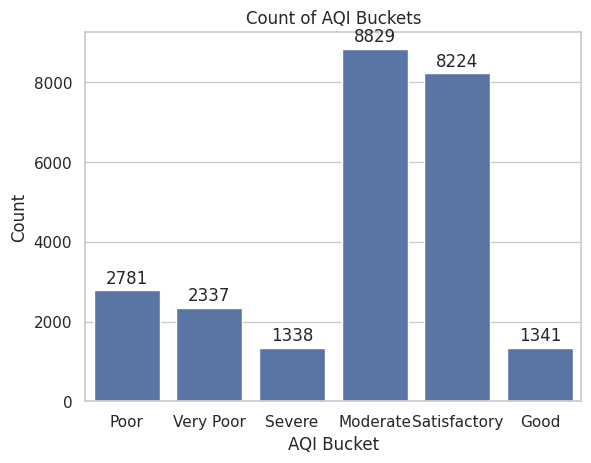

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
ax = sns.countplot(x=df["AQI_Bucket"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.title("Count of AQI Buckets")
plt.xlabel("AQI Bucket")
plt.ylabel("Count")
plt.show()

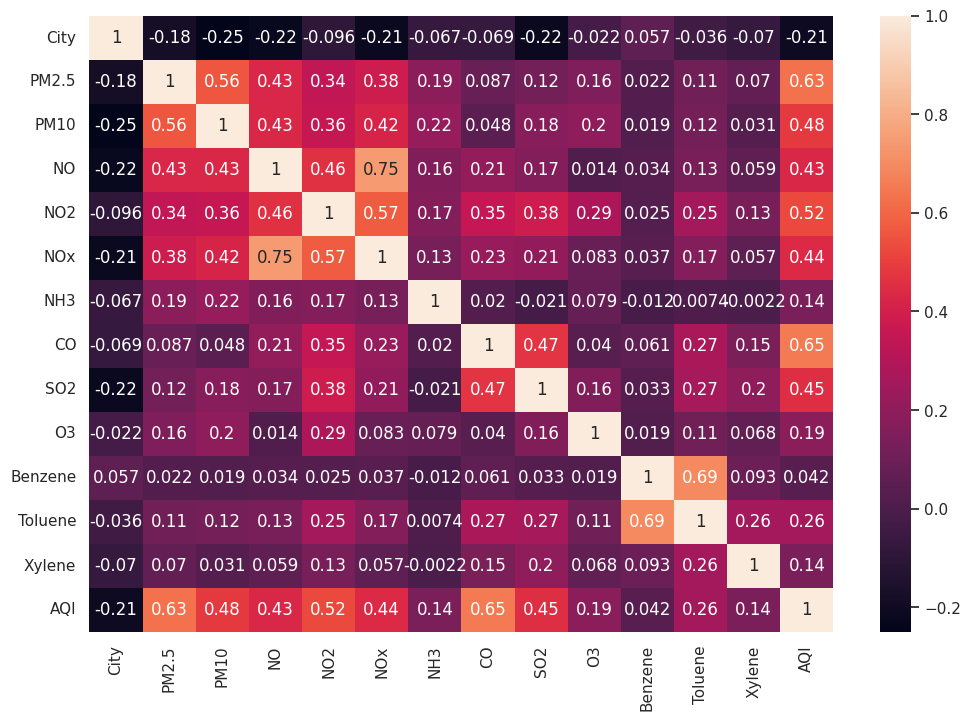

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [ ]:
df2.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [ ]:
features = df2[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
labels = df2['AQI']

In [ ]:
#splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size=0.2, random_state=2)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X, y make_regression(n_features=4, n_informative 2, random_state=0, shuffle False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(Xtrain, Ytrain)
print(regr.predict(Xtest))

[120.44445696 120.44445696 120.44445696 ... 120.44445696 307.33721799
 307.33721799]


In [ ]:
y_pred=regr.predict(Xtest)

In [ ]:
from sklearn.metrics import r2_score
r2_score (Ytest, y_pred)

0.6540144120689928

In [ ]:
def get_aqi_severity(aqi):
    if 0 <= aqi <= 50:
        return "Good"
    elif 51 <= aqi <= 100:
        return "Satisfactory"
    elif 101 <= aqi <= 200:
        return "Moderate"
    elif 201 <= aqi <= 300:
        return "Poor"
    elif 301 <= aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(dict0fWords)

{'Amritsar': 0, 'Ernakulam': 1, 'Delhi': 2, 'Guwahati': 3, 'Jorapokhar': 4, 'Talcher': 5, 'Patna': 6, 'Coimbatore': 7, 'Mumbai': 8, 'Ahmedabad': 9, 'Chandigarh': 10, 'Chennai': 11, 'Hyderabad': 12, 'Lucknow': 13, 'Visakhapatnam': 14, 'Gurugram': 15, 'Bhopal': 16, 'Aizawl': 17, 'Kochi': 18, 'Bengaluru': 19, 'Amaravati': 20, 'Thiruvananthapuram': 21, 'Shillong': 22, 'Kolkata': 23, 'Jaipur': 24, 'Brajrajnagar': 25}


In [ ]:
# Example of predicting AQI based on sample input
sample_input = np.array([[8,	67.45,	118,	0.97,	15.69,	16,	23,	0.97,24.55,	34,	3.68,	5.5,	3.77]])  # City Mumbai
predicted_aqi = regr.predict(sample_input)
severity = get_aqi_severity(predicted_aqi)
print(f'Predicted AQI: {predicted_aqi}')
print(f'Severity: {severity}')

Predicted AQI: [120.44445696]
Severity: Moderate


In [ ]:
sample_input = np.array([[2, 313, 607, 36, 110, 33, 15, 9, 41, 14, 24, 9, 11]])  # City Delhi
predicted_aqi = regr.predict(sample_input)
severity = get_aqi_severity(predicted_aqi)
print(f'Predicted AQI: {predicted_aqi}')
print(f'Severity: {severity}')

Predicted AQI: [307.33721799]
Severity: Very Poor
